# Analyzing data from about GDP and life expectancy from the World Health Organization and the World Bank.

We have the following nominal categorical variables in the dataset: Country
Likewise, we have the following quantitive variables: GDP, Life expetancy, and Year. We shall inspect these data types further after importing the dataset. Given the variables we will firstly perform univariate analysis to determine the ditribution of Life expectancy, then we will look at a possible association between life expectancy and GDP. Our null hypothesis being that there is no assocation between the two variables. We will look at the covariance using a scatterplot in the seaborn library. Then, we'll look to countries and life expectancy, visualising it through a boxplot. As well as this, we will plot a line graph with life expectancy and year. 

Has life expectancy increased over time in the six nations?
Has GDP increased over time in the six nations?
Is there a correlation between GDP and life expectancy of a country?
What is the average life expectancy in these nations?

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [169]:
df = pd.read_csv('all_data.csv')
df = df.rename(columns={'Life expectancy at birth (years)': 'life_exp'})
print(df.head(10))
print(df.dtypes)
print(df.columns)

  Country  Year  life_exp           GDP
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10
5   Chile  2005      78.4  1.229650e+11
6   Chile  2006      78.9  1.547880e+11
7   Chile  2007      78.9  1.736060e+11
8   Chile  2008      79.6  1.796380e+11
9   Chile  2009      79.3  1.723890e+11
Country      object
Year          int64
life_exp    float64
GDP         float64
dtype: object
Index(['Country', 'Year', 'life_exp', 'GDP'], dtype='object')


## What is the average GDP per country?

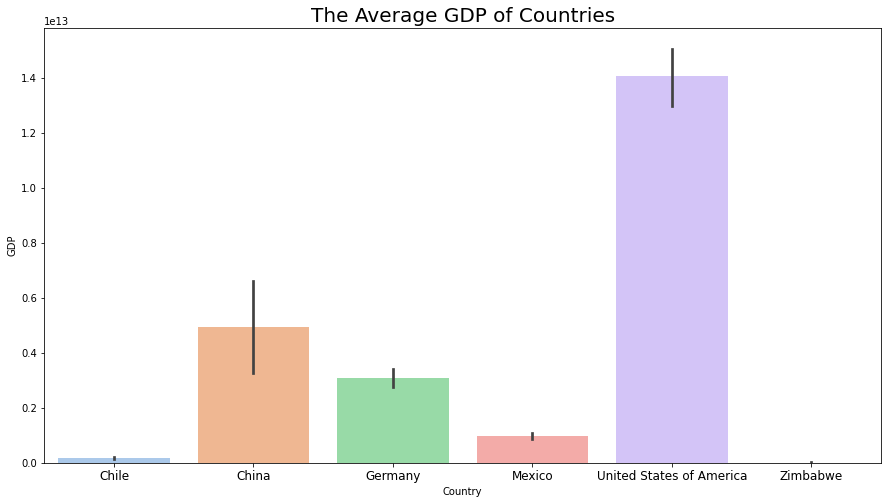

<Figure size 432x288 with 0 Axes>

In [233]:
plt.figure(figsize=(15, 8))
sns.barplot(x = 'Country', y = 'GDP', data = df, palette='pastel')
plt.xticks(size=12)
plt.title('The Average GDP of Countries', size = 20)
plt.show()
plt.clf()

Zimbabwe clearly has a much lower median life expectancy than the others, with a much large standard deviation as well as maximum and minimum values. Germany has the highest mean life expectancy. Suprisingly, Mexico's life expectancy has the lowest spread of all the countries. 

## Have the countries grown in GDP between 2010 and 2015?

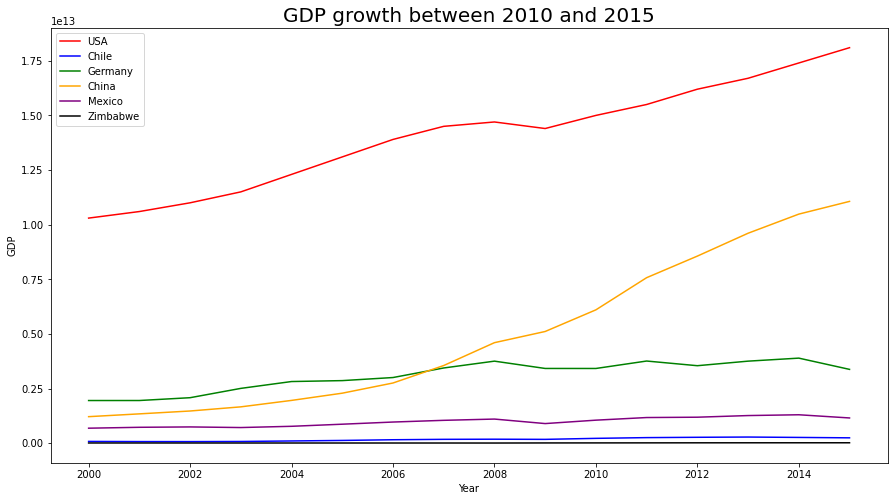

<Figure size 432x288 with 0 Axes>

In [220]:
usa = df[df['Country'] == 'United States of America']
chile = df[df['Country'] == 'Chile']
china = df[df['Country'] == 'China']
germany = df[df['Country'] == 'Germany']
mexico = df[df['Country'] == 'Mexico']
zimbabwe = df[df['Country'] == 'Zimbabwe']
plt.figure(figsize=(15, 8))
plt.title('GDP growth between 2010 and 2015', size=20)
plt.plot(usa['Year'], usa['GDP'], color = 'r')
plt.plot(chile['Year'], chile['GDP'], color='b')
plt.plot(germany['Year'], germany['GDP'], color ='g')
plt.plot(china['Year'], china['GDP'], color='orange')
plt.plot(mexico['Year'], mexico['GDP'], color='purple')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.plot(zimbabwe['Year'], zimbabwe['GDP'], color='black')
countries = ['USA', 'Chile', 'Germany', 'China', 'Mexico', 'Zimbabwe']
plt.legend(['USA', 'Chile', 'Germany', 'China', 'Mexico', 'Zimbabwe'], loc='upper left')
plt.show()
plt.clf()



While Zimababwe, Mexico and Germany have had stagnant GDP growth in the period 2000-2015, China and the USA have increased at a fast rate, especially after 2010. The US's growth dipped for a period after 2008 which is likely due to the financial crisis of that year. China, however, was the only country that was not affected and continued GDP growth through this period. 

## Has life expectancy increased over time in the six nations?



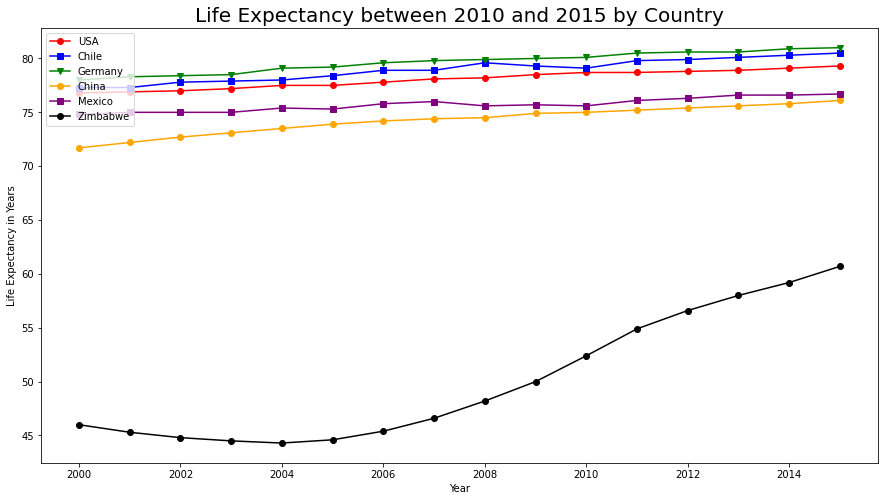

<Figure size 432x288 with 0 Axes>

In [225]:
plt.figure(figsize=(15, 8))
plt.title('Life Expectancy between 2010 and 2015 by Country', size=20)
plt.plot(usa['Year'], usa['life_exp'], color = 'r', marker='o')
plt.plot(chile['Year'], chile['life_exp'], color='b', marker='s')
plt.plot(germany['Year'], germany['life_exp'], color ='g', marker='v')
plt.plot(china['Year'], china['life_exp'], color='orange', marker='o')
plt.plot(mexico['Year'], mexico['life_exp'], color='purple', marker='s')
plt.plot(zimbabwe['Year'], zimbabwe['life_exp'], color='black', marker='o')
countries = ['USA', 'Chile', 'Germany', 'China', 'Mexico', 'Zimbabwe']
plt.legend(['USA', 'Chile', 'Germany', 'China', 'Mexico', 'Zimbabwe'], loc='upper left')
plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
plt.show()
plt.clf()



Interestingly, Zimbabwe's life expectancy decresed between the years 2000 and 2004. After 2004, the life expectancy increased at a much faster rate than any other country from the dataset. Mexico's growth has been the lowest. 

(70.0, 85.0)

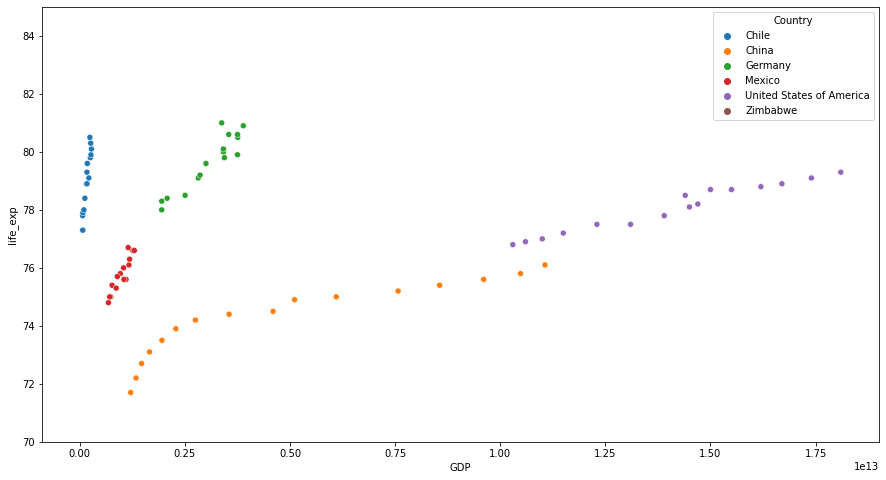

In [230]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'GDP', y = 'life_exp', data = df, hue = 'Country')
plt.ylim(70, 85)



From the data, we can see that as a country's GDP has grown, its life expectancy has increased. There is a positive covariance between these two variables. For the sake of more focused analyis, Zimbabwe has been removed from the dataset as it was distorting the data. 

## Let's take a closer look at China's relationship between GDP and life expectancy

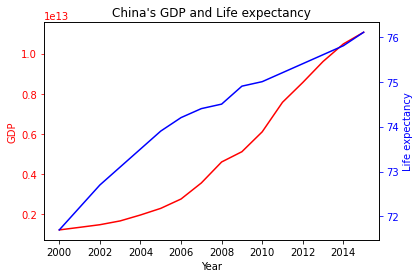

In [243]:
fig, ax = plt.subplots()
plt.title('China\'s GDP and Life expectancy')
ax.plot(china['Year'], china['GDP'], color='red')
ax.set_xlabel('Year')
ax.set_ylabel('GDP', color='red')
ax.tick_params('y', colors='red')

ax2 = ax.twinx()
ax2.plot(china['Year'], china['life_exp'], color='blue')
ax2.set_ylabel('Life expectancy', color='blue')
ax2.tick_params('y', colors='blue')

plt.show()



## What is the average life expectancy for these six countries?

                          life_exp
Country                           
Germany                   79.65625
Chile                     78.94375
United States of America  78.06250
Mexico                    75.71875
China                     74.26250
Zimbabwe                  50.09375


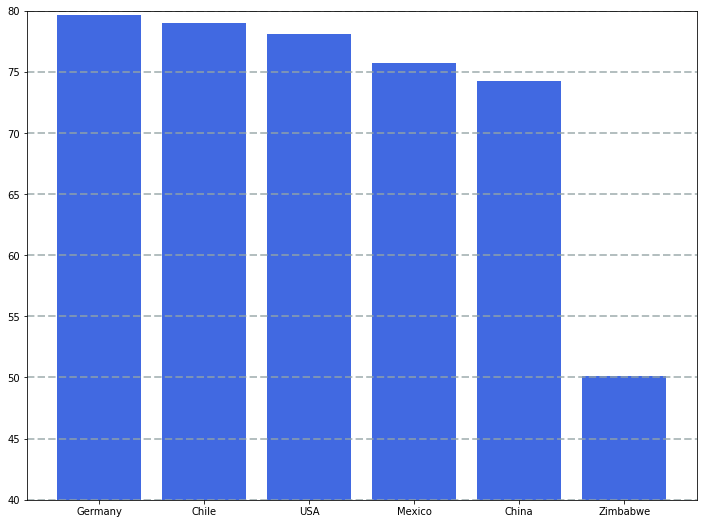

In [207]:
country_life_exp = df.groupby('Country').agg({'life_exp': 'mean'})
country_life_exp = country_life_exp.sort_values('life_exp',ascending=False)
countries = ['Germany', 'Chile', 'USA', 'Mexico', 'China', 'Zimbabwe']
fig, ax = plt.subplots(figsize=(12, 9))
plt.bar(range(len(country_life_exp)), country_life_exp.life_exp, color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim(40, 80)
ax.set_xticks(range(len(country_life_exp)))
ax.set_xticklabels(countries)
print(country_life_exp)

The outlier of this group is clearly Zimbabwe, whose average life expectancy is nearly half that of Germany. The other countries have a relatively similar life expectancy. 

## What is the distirbution of life expectancy by country?

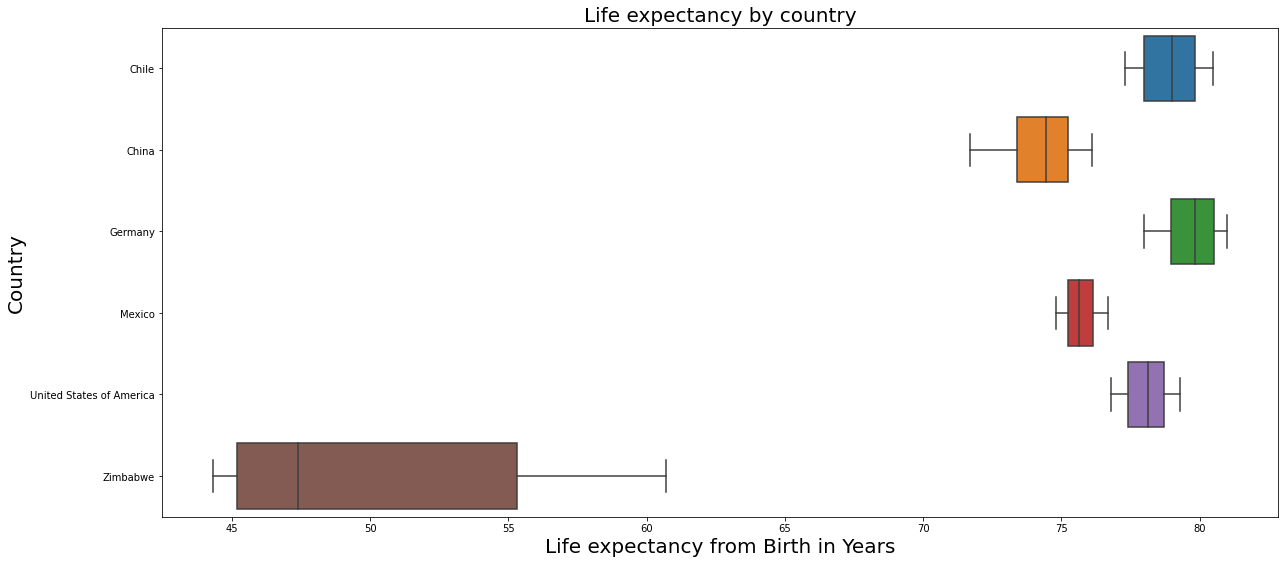

<Figure size 432x288 with 0 Axes>

In [236]:
plt.figure(figsize=(20, 9))
sns.boxplot(x = 'life_exp', y = 'Country', data = df)
plt.title('Life expectancy by country', size=20)
plt.xlabel('Life expectancy from Birth in Years', size=20)
plt.ylabel('Country', size=20)
plt.show()
plt.clf()

The spread of Zimbabwe's life expectancy is by far the greatest, which covers 40 and 62. The majority of the data is between 45 and 55. This is a much greater standard deviation than any other country.

## Key findings as takeaways:
 ### With the USA having the largest Gross Domestic Product, China's will continue to grow at a faster rate. 
 ### As an average over the period of 2000 and 2015, China's GDP is roughly 40 percent of the USA's GDP.
 ### Zimbabwe's life expectancy is growing exponentially, although it is currently on average 50 years old. Whilst Germany has an average GDP of just under 80 years old. 
 ### There is a strong association between Life expectancy and GDP, they have a positive covariance.
 ### The distribution of Zimbabwe's life expectancy is enormous. Mexico has the lowest distribution.
 
